## Уравнение логистического роста или уравнение Ферхюльста

    x(n+1) = r*x(n)*(1 - x(n))

In [157]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from pprint import pprint

x0 = 0.5

x_prev = x0
x_next = 0
r = 2.5

t = list()
x_vals = list()

t.append(0)
x_vals.append(x0)

for i in range(1, 15):
    x_next = r * x_prev * (1 - x_prev)
    x_prev = x_next
    
    t.append(i)
    x_vals.append(x_next)
    

pprint(x_vals)

[0.5,
 0.625,
 0.5859375,
 0.606536865234375,
 0.5966247408650815,
 0.6016591486318896,
 0.5991635437485985,
 0.6004164789780495,
 0.5997913268741273,
 0.6001042277017528,
 0.599947858990589,
 0.6000260637079934,
 0.5999869664477111,
 0.6000065163514607,
 0.5999967417181126]


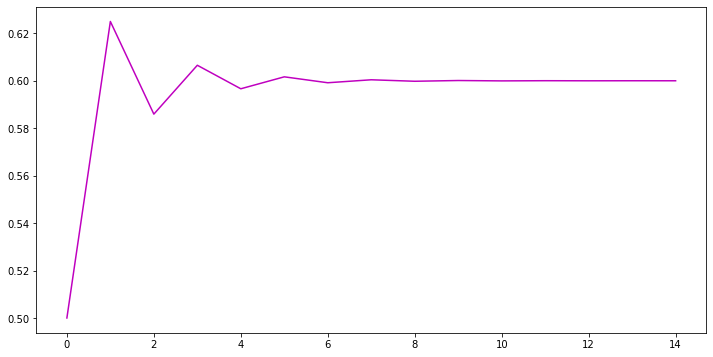

In [158]:
plt.figure(figsize = (12, 6))
plt.plot(t, x_vals, color='m')
plt.show()

In [159]:
"""
Создадим функцию, принимающую:
- начальное значение популяции,
- фактор роста,
- количество итераций 
и возвращающую список со значениями численности популяции по годам
"""

def population_equation(x0 = 0.5, r = 1, num_iterations = 50):
    
    if x0 >= 1:
        print("Warning! Your population will extinct!")
    
    x_prev = x0
    x_next = 0
    
    t = list()
    x_vals = list()

    t.append(0)
    x_vals.append(x0)
    
    for i in range(1, 35):
        x_next = r * x_prev * (1 - x_prev)
        x_prev = x_next

        t.append(i)
        x_vals.append(x_next)
        
    return t, x_vals

In [160]:
_, x = population_equation(x0=0.1, r=3, num_iterations=150)
print(x)

[0.1, 0.2700000000000001, 0.5913000000000002, 0.7249929299999999, 0.5981345443500454, 0.7211088336156269, 0.603332651091411, 0.7179670896552621, 0.6074710434816448, 0.7153499244388992, 0.6108732301324811, 0.7131213805199696, 0.613737831495787, 0.7111911170599079, 0.6161949362249648, 0.7094962103870291, 0.6183340135004208, 0.7079911837466467, 0.6202190024510059, 0.7066421743490551, 0.6218970353408841, 0.7054233383253097, 0.623403756213856, 0.7043145388569335, 0.6247667076350358, 0.7032998059977404, 0.6260075666438433, 0.7023662794454921, 0.627143666830167, 0.7015034639549386, 0.6281890620424823, 0.7007026931180059, 0.6291552869255387, 0.6999567355775453, 0.6300519116915149]


In [161]:
def find_stationary_vals(population_list):
    
    epsilon = 0.001
        
    stational = []
    stational.append(population_list[-1])

    for j in range(-2, -16, -1):
            x1 = population_list[j]
            # print(x1)

            if abs(x1 - stational[0]) > epsilon:
                stational.append(x1)
            else:
                break
    
    # print(stational)
    return stational            
    
find_stationary_vals(x)

[0.6300519116915149, 0.6999567355775453]

In [162]:
r = 0.8
delta = 0.02

stational_vals = []
factors = []

for i in range(400):
    _, x = population_equation(x0=0.1, r=r, num_iterations=1000)
    
    stational_vals.append(find_stationary_vals(x))
    
    for i in range(len(stational_vals[-1])):
        factors.append(r)
    
    r += delta
    
#pprint(stat)
#pprint(r)

print("Пройдено шагов: ", len(stational_vals))
print("Рассчитано популяций: ", len(factors))


Пройдено шагов:  400
Рассчитано популяций:  783


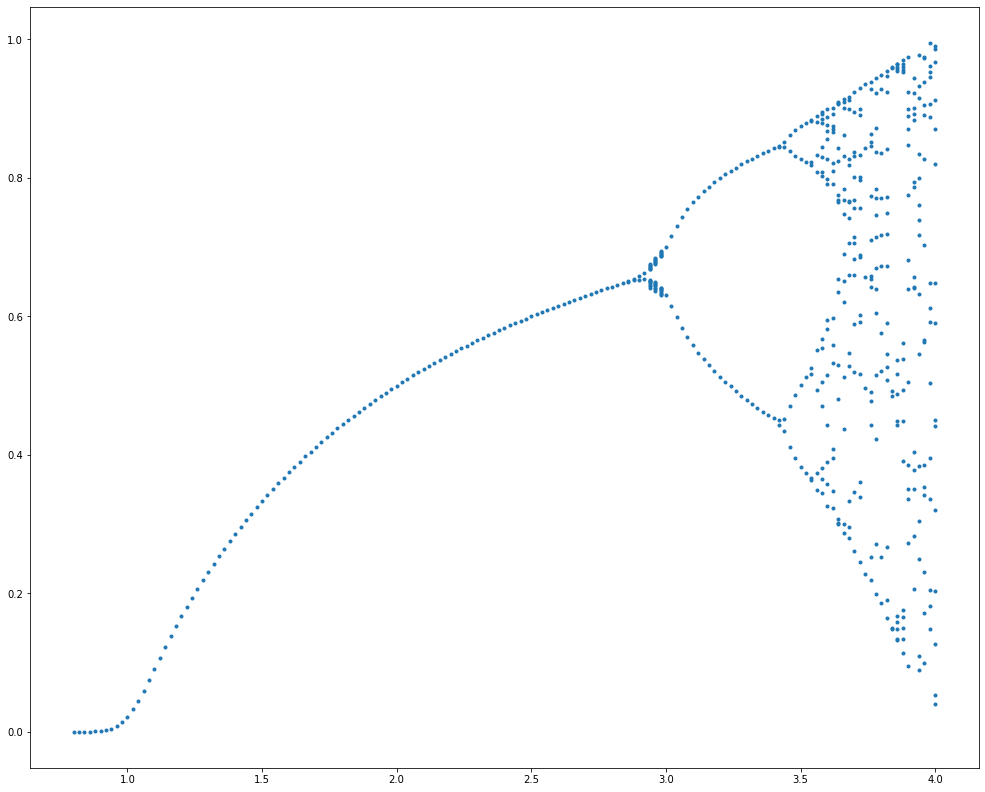

In [163]:
import itertools

y = list(itertools.chain.from_iterable(stational_vals))
# print(y, len(merged))

# mpl.rcParams["lines.linewidth."] = 1

# see https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers
mpl.rcParams["scatter.marker"] = '.'
plt.figure(figsize=(17, 14))
plt.scatter(factors, y)
plt.show()